In [ ]:
!pip install  dgl -f https://data.dgl.ai/wheels/cu116/repo.html
!pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels/cu116/repo.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels-test/repo.html


In [ ]:
import dgl
import torch

print(dgl.__version__)
print(torch.cuda.is_available())
print("DGL version:", dgl.__version__)
print("CUDA version:", torch.version.cuda)
!nvcc --version

1.1.0+cu116
False
DGL version: 1.1.0+cu116
CUDA version: 11.8
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


# Modeling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Insert, change the directory 
import sys
sys.path.insert(0,'/content/drive/MyDrive/graph-based-fraud-detection-main')
%cd /content/drive/MyDrive/graph-based-fraud-detection-main
# %cd /content/drive/MyDrive/dgl_fraud_detection

/content/drive/MyDrive/graph-based-fraud-detection-main


In [ ]:
import os
import sys
import glob

os.environ['DGLBACKEND'] = 'pytorch'

import torch as th
import dgl
import numpy as np

from gnn.estimator_fns import *
from gnn.graph_utils import *
from gnn.data import *
from gnn.utils import *
from gnn.pytorch_model import *
from train import *

DLG version: 1.1.0+cu116


### Load data

In [ ]:
file_list = glob.glob('./data/*edgelist.csv')

edges = ",".join(map(lambda x: x.split("/")[-1], [file for file in file_list if "relation" in file]))

### Generate graph

In [ ]:
print('numpy version:{} PyTorch version:{} DGL version:{}'.format(np.__version__,
                                                                    th.__version__,
                                                                    dgl.__version__))

args = parse_args()
print(args)

numpy version:1.22.4 PyTorch version:2.0.0+cu118 DGL version:1.1.0+cu116
Namespace(training_dir='./data', model_dir='./model/2023_04_27_08_04_49', output_dir='./output', nodes='features.csv', target_ntype='TransactionID', edges='relation*', labels='tags.csv', new_accounts='test.csv', compute_metrics=True, threshold=0, num_gpus=0, optimizer='adam', lr=0.01, n_epochs=1000, n_hidden=32, n_layers=6, weight_decay=0.0005, dropout=0.2, embedding_size=360)


In [ ]:
# added
# args.training_dir = '/content/drive/MyDrive/graph-based-fraud-detection-main/data'
# args.nodesmodel_dir='/content/drive/MyDrive/graph-based-fraud-detection-main/model/2023_03_31_20_49_19'
# args.output_dir = '/content/drive/MyDrive/graph-based-fraud-detection-main/output'
args.n_hidden=8
args.n_layers=1
args.n_epochs=200

In [ ]:
args.edges = edges

args.edges = get_edgelists('relation*', args.training_dir)

In [ ]:
g, features, target_id_to_node, id_to_node = construct_graph(args.training_dir,
                                                                args.edges,
                                                                args.nodes,
                                                                args.target_ntype)

Getting relation graphs from the following edge lists : ['relation_card1_edgelist.csv', 'relation_card2_edgelist.csv', 'relation_card3_edgelist.csv', 'relation_card4_edgelist.csv', 'relation_card5_edgelist.csv', 'relation_card6_edgelist.csv', 'relation_ProductCD_edgelist.csv', 'relation_addr1_edgelist.csv', 'relation_addr2_edgelist.csv', 'relation_P_emaildomain_edgelist.csv', 'relation_R_emaildomain_edgelist.csv', 'relation_id_01_edgelist.csv', 'relation_TransactionID_edgelist.csv', 'relation_id_03_edgelist.csv', 'relation_id_02_edgelist.csv', 'relation_id_04_edgelist.csv', 'relation_id_05_edgelist.csv', 'relation_id_07_edgelist.csv', 'relation_id_06_edgelist.csv', 'relation_id_08_edgelist.csv', 'relation_id_09_edgelist.csv', 'relation_id_10_edgelist.csv', 'relation_id_11_edgelist.csv', 'relation_id_13_edgelist.csv', 'relation_id_12_edgelist.csv', 'relation_id_14_edgelist.csv', 'relation_id_15_edgelist.csv', 'relation_id_16_edgelist.csv', 'relation_id_17_edgelist.csv', 'relation_id_18_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Read in features for target nodes
after getting features []
edgelist:  [(4, 0), (8, 1), (10, 2), (16, 3), (17, 2), (40, 2), (48, 2), (49, 2), (57, 4), (66, 2), (70, 1), (72, 5), (74, 2), (84, 2), (93, 2), (99, 1), (100, 4), (101, 3), (104, 4), (105, 6), (111, 2), (114, 2), (119, 3), (121, 3), (125, 3), (130, 2), (138, 2), (141, 3), (144, 3), (145, 1), (148, 1), (156, 2), (167, 2), (173, 1), (183, 7), (189, 2), (192, 2), (196, 2), (197, 1), (198, 1), (207, 1), (209, 2), (211, 8), (236, 1), (240, 9), (243, 9), (245, 9), (248, 1), (252, 2), (258, 2), (262, 2), (265, 1), (266, 2), (270, 1), (271, 2), (273, 1), (275, 3), (281, 2), (284, 2), (301, 10), (311, 3), (316, 2), (327, 2), (328, 2), (332, 1), (333, 2), (335, 1), (336, 1), (337, 1), (338, 1), (352, 11), (355, 3), (361, 3), (366, 1), (367, 12), (374, 3), (376, 3), (386, 13), (387, 14), (389, 3), (390, 3), (398, 15), (404, 1), (406, 1), (408, 1), (412, 2), (416, 1), (425, 1), (429, 2), (433, 1), (434, 1), (435, 2), (437, 1), (439, 16),

In [ ]:
# ACTUAL CODE
mean, stdev, features = normalize(th.from_numpy(features))

print('feature mean shape:{}, std shape:{}'.format(mean.shape, stdev.shape))

feature mean shape:torch.Size([390]), std shape:torch.Size([390])


In [ ]:
g.number_of_nodes('target')

590540

In [ ]:
g.nodes['target'].data['features'] = features

print("Getting labels")
n_nodes = g.number_of_nodes('target')

labels, _, test_mask = get_labels(target_id_to_node,
                                            n_nodes,
                                            args.target_ntype,
                                            os.path.join(args.training_dir, args.labels),
                                            os.path.join(args.training_dir, args.new_accounts))
print("Got labels")

labels = th.from_numpy(labels).float()
test_mask = th.from_numpy(test_mask).float()

n_nodes = th.sum(th.tensor([g.number_of_nodes(n_type) for n_type in g.ntypes]))
n_edges = th.sum(th.tensor([g.number_of_edges(e_type) for e_type in g.etypes]))

print("""----Data statistics------'
            #Nodes: {}
            #Edges: {}
            #Features Shape: {}
            #Labeled Test samples: {}""".format(n_nodes,
                                                    n_edges,
                                                    features.shape,
                                                    test_mask.sum()))

Getting labels
Got labels
----Data statistics------'
            #Nodes: 726345
            #Edges: 19518802
            #Features Shape: torch.Size([590540, 390])
            #Labeled Test samples: 118108.0


### Training

In [ ]:
if args.num_gpus:
    cuda = True
    device = th.device('cuda:0')
else:
    cuda = False
    device = th.device('cpu')

In [ ]:
print(device)

cpu


In [ ]:
# added
# device = th.device('cuda:0')
# print(device)

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, message='TypedStorage is deprecated')

Initializing Model
Initialized Model
Starting Model training
Epoch 00000, Time(s) 14.9987, Loss 0.8850, F1 0.0063 
Epoch 00001, Time(s) 15.3365, Loss 0.3400, F1 0.0275 
Epoch 00002, Time(s) 14.7826, Loss 0.3711, F1 0.0775 
Epoch 00003, Time(s) 14.2849, Loss 0.3402, F1 0.1888 
Epoch 00004, Time(s) 14.1181, Loss 0.2737, F1 0.2929 
Epoch 00005, Time(s) 14.0843, Loss 0.2460, F1 0.2836 
Epoch 00006, Time(s) 13.9384, Loss 0.2737, F1 0.3218 
Epoch 00007, Time(s) 13.9189, Loss 0.2077, F1 0.3174 
Epoch 00008, Time(s) 13.8899, Loss 0.1622, F1 0.2695 
Epoch 00009, Time(s) 13.8020, Loss 0.1513, F1 0.2320 
Epoch 00010, Time(s) 13.7715, Loss 0.1512, F1 0.2117 
Epoch 00011, Time(s) 13.7298, Loss 0.1551, F1 0.2061 
Epoch 00012, Time(s) 13.7140, Loss 0.1578, F1 0.2138 
Epoch 00013, Time(s) 13.6983, Loss 0.1534, F1 0.2365 
Epoch 00014, Time(s) 13.6608, Loss 0.1425, F1 0.2693 
Epoch 00015, Time(s) 13.6480, Loss 0.1309, F1 0.3043 
Epoch 00016, Time(s) 13.6445, Loss 0.1228, F1 0.3269 
Epoch 00017, Time(s) 

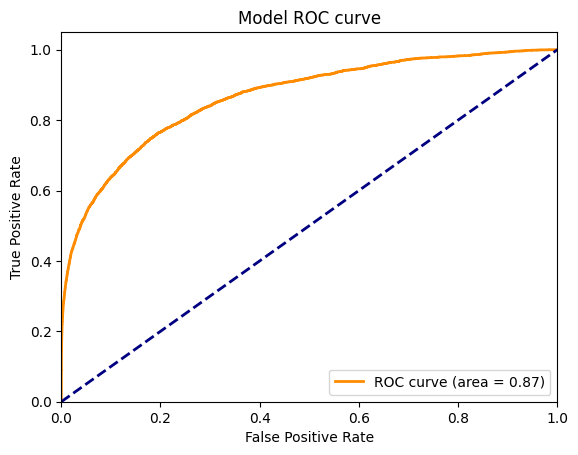

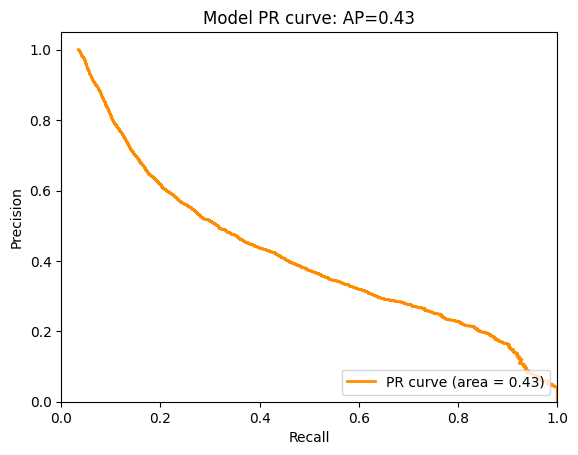

In [ ]:
print("Initializing Model")
in_feats = features.shape[1]
n_classes = 2

ntype_dict = {n_type: g.number_of_nodes(n_type) for n_type in g.ntypes}

model = get_model(ntype_dict, g.etypes, vars(args), in_feats, n_classes, device)
print("Initialized Model")

features = features.to(device)

labels = labels.long().to(device)
test_mask = test_mask.to(device)
g = g.to(device) #added

loss = th.nn.CrossEntropyLoss()

# print(model)
optim = th.optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.weight_decay)

print("Starting Model training")

# initial_record()
# Move the graph to the CUDA device
# g = g.to('cuda:0')
# Assign node feature "Wh_DeviceInfo<>target" to the graph
# g.ndata['Wh_DeviceInfo<>target'] = node_feature_cuda

model, class_preds, pred_proba = train_fg(model, optim, loss, features, labels, g, g,
                                            test_mask, device, args.n_epochs,
                                            args.threshold,  args.compute_metrics)
print("Finished Model training")

print("Saving model") 

if not os.path.exists(args.model_dir):
    os.makedirs(args.model_dir)

save_model(g, model, args.model_dir, id_to_node, mean, stdev)
print("Model and metadata saved")